In [4]:
# 다중 분류 문제 해결 - 아이리스 품종 예측

In [6]:
import pandas as pd

df_iris = pd.read_csv('./data/iris3.csv')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


[]

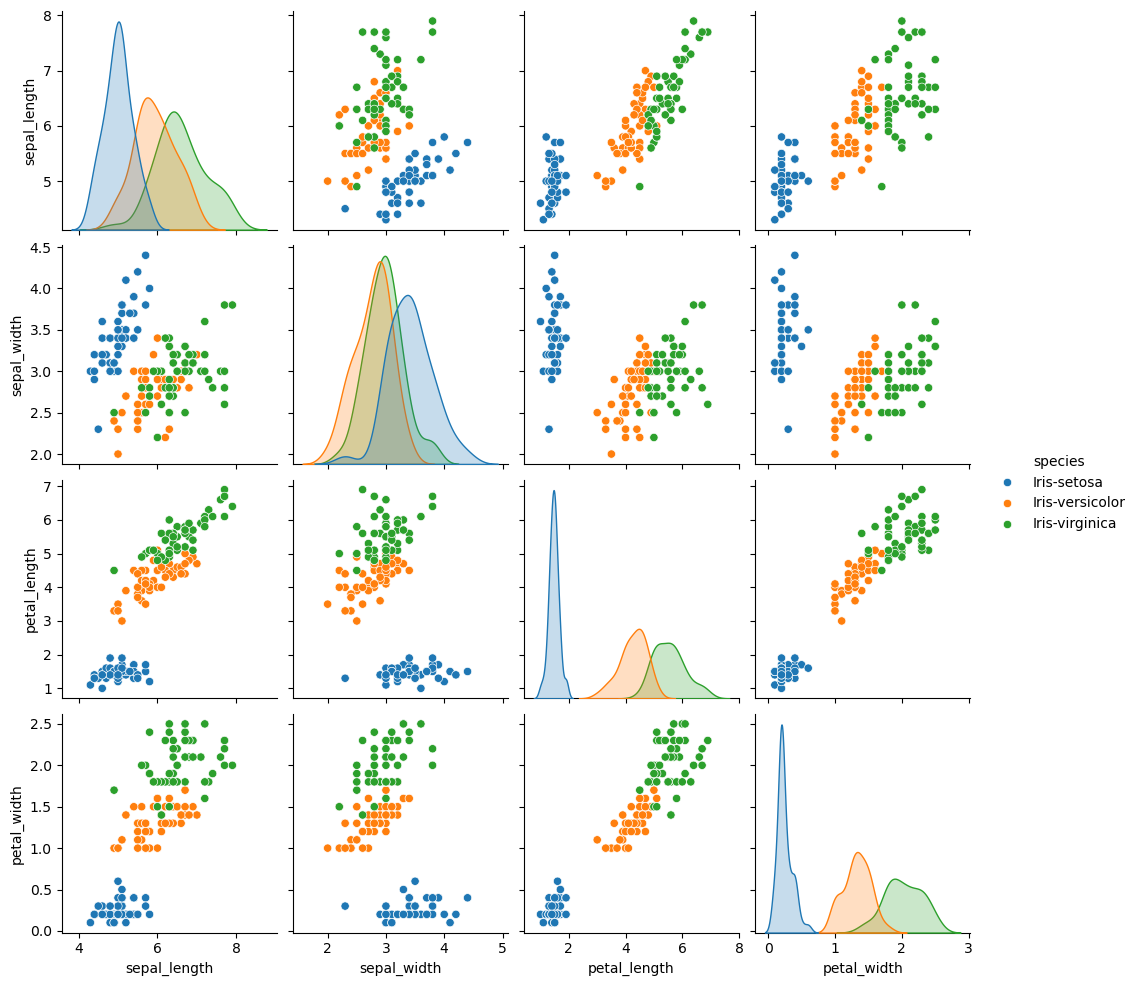

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_iris, hue='species')
plt.plot()

In [10]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
df_iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [14]:
df_iris.species.values ## numpy array로 변환

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

## 원핫 인코딩 
### (1) 방법 1 : scikit-learn의 LabelEncoder와 tensorflow의 to_categorical 활용

In [16]:
np_data = df_iris.values  # numpy array로 변환
np_data

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [18]:
## 슬라이싱으로 X, Y 데이터 셋업
X = np_data[:, :-1]  # 4개의 입력 속성 데이터
Y_obj = np_data[:, -1]
Y_obj

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [18]:
# !pip install scikit-learn

In [20]:
## 클래스를 숫자로 변환!!!  (클래스가 0, 1, 2였으면 이 과정 필요 없음)
## iris-setosa : 0, Iris-versicolor: 1, Iris-virginica:2
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y  # 숫자로 변환된 데이터

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
## 원핫 인코딩 : 텐서플로 활용
import tensorflow as tf
Y_onehot = tf.keras.utils.to_categorical(Y)  # Y 데이터를 카테고리 자료로 변환
Y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [23]:
## 클래스와 변환된 데이터의 관계
classes = e.classes_
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
# 필요한 라이브러리 import
import numpy as np

In [30]:
np.array([0.7, 0.2, 0.1]).argmax()

0

In [32]:
np.argmax(np.array([0.7, 1.2, 4.1]))

2

In [34]:
classes[ np.array([0.7, 0.2, 0.1]).argmax() ]

'Iris-setosa'

### (2) 원핫인코딩 : Pandas의 get_dummies()를  활용하는 방법

In [36]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [38]:
X = df_iris.iloc[:, :-1]
Y = df_iris.iloc[:, -1]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [42]:
## pandas로 원핫 인코딩
Y_onehot = pd.get_dummies(Y)
Y_onehot

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [44]:
(Y_onehot.values) * 1.0

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [41]:
## 각 클래스의 이름이 무엇인가???

In [46]:
Y_onehot.columns

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [48]:
Y_onehot.values[0]

array([ True, False, False])

In [50]:
argmax = Y_onehot.values[0].argmax()
argmax

0

In [52]:
Y_onehot.columns[argmax]

'Iris-setosa'

In [54]:
Y_onehot.shape  # pandas DataFrame형태

(150, 3)

In [56]:
Y_onehot

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [58]:
Y_onehot.values * 1.0

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## Softmax 활성화 함수

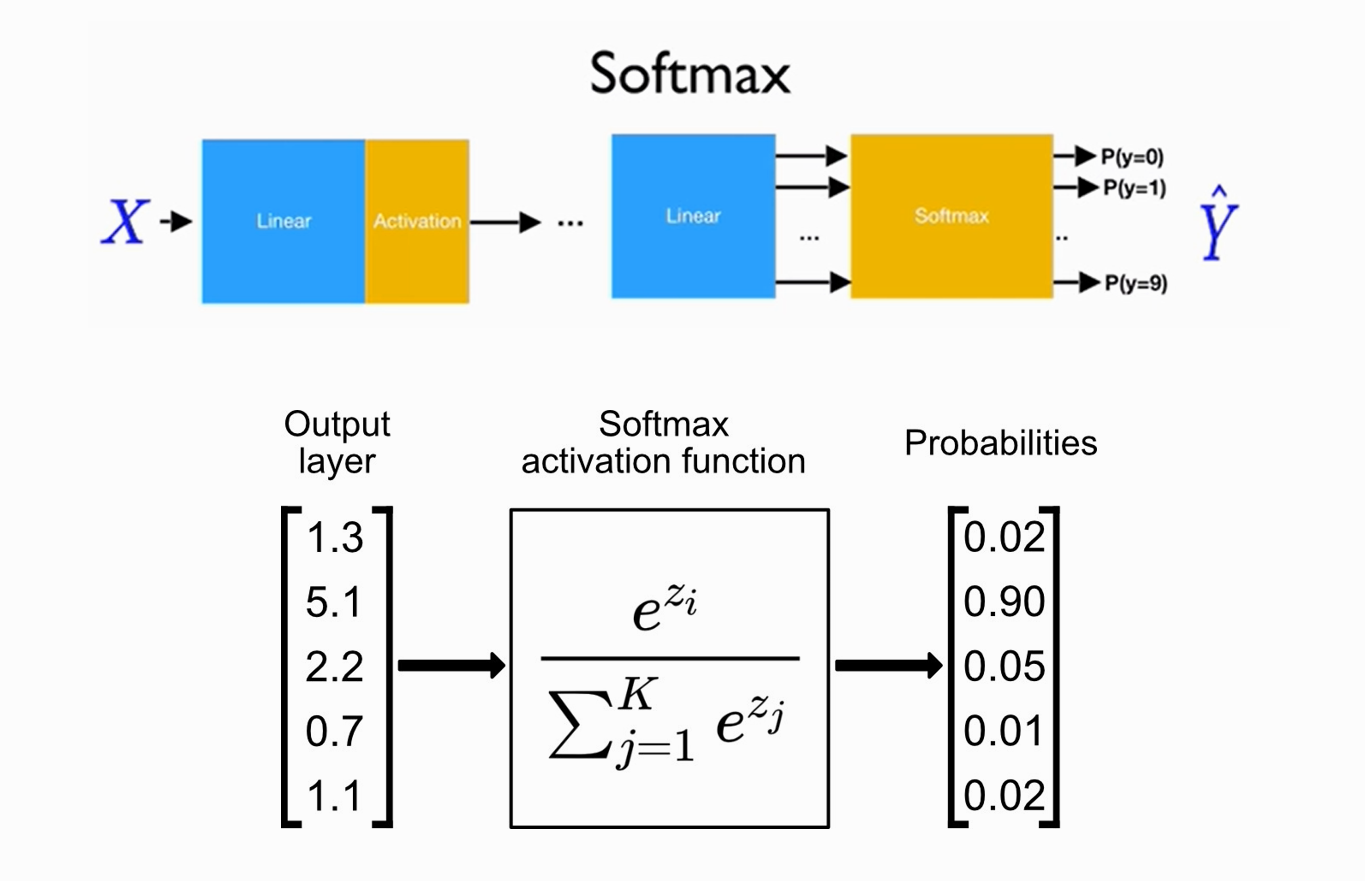

In [60]:
import numpy as np
def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z))

Z = np.array([1.3, 5.1, 2.2, 0.7, 1.1])
softmax(Z)

array([0.02019046, 0.90253769, 0.04966053, 0.01108076, 0.01653055])

In [62]:
softmax(Z).sum()

1.0

In [64]:
Z

array([1.3, 5.1, 2.2, 0.7, 1.1])

In [66]:
np.exp(Z)

array([  3.66929667, 164.0219073 ,   9.0250135 ,   2.01375271,
         3.00416602])

In [68]:
np.exp(Z[0]),  np.exp(Z[1])

(3.6692966676192444, 164.0219072999017)

In [80]:
df_iris.shape   # 5개의 Columns에서 5번째 열은 제외 => input_dim=4

(150, 5)

In [83]:
##########################################################################
# 다중 분류 (아이리스) : 아래의 코드에서 Accuracy가 높게 나오도록
#                     학습하고, 학습결과를 시각화 하기
##########################################################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 아이리스 데이터를 불러옵니다.
df = pd.read_csv('./data/iris3.csv')

# 속성을 X, 클래스를 y로 저장합니다.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 원-핫 인코딩 처리를 합니다.
y_onehot = pd.get_dummies(y)

# 모델 설정
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# 모델 컴파일 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history = model.fit(X, y_onehot, epochs=500)

C:\Users\5012j\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3290 - loss: 0.7642
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3359 - loss: 0.7393 
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3390 - loss: 0.7266 
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3064 - loss: 0.7126 
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3806 - loss: 0.6728 
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3372 - loss: 0.6771  
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3503 - loss: 0.6582  
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3247 - loss: 0.6545  
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2943 - loss: 0.6535  
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3559 - loss: 0.6326  
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3121 - loss: 0.6337  
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3333

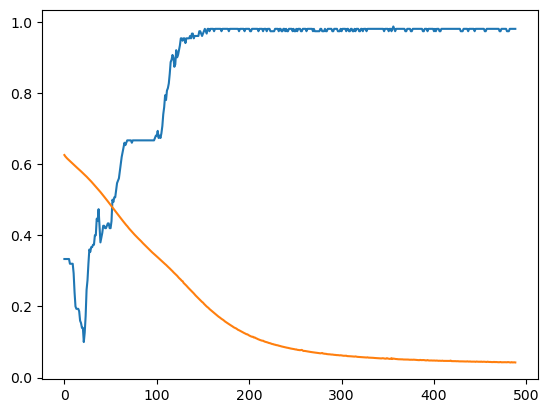

In [85]:
## 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'][11:])
plt.plot(history.history['loss'][11:])
plt.show()

In [87]:
## X data를  입력하여 검증 (evaluate, predict)
result = model.evaluate(X, y_onehot)
type(result)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9873 - loss: 0.0278      


list

In [89]:
print("Accuracy: ", result[1])
print("Loss: ", result[0])

Accuracy:  0.9800000190734863
Loss:  0.04237884655594826


In [91]:
X_samples = X.values[[1, 51, 101, 102]]
X_samples

array([[4.9, 3. , 1.4, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [5.8, 2.7, 5.1, 1.9],
       [7.1, 3. , 5.9, 2.1]])

In [93]:
y_predicted = model.predict(X_samples)
y_predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


array([[9.9999785e-01, 2.1807675e-06, 2.0189517e-13],
       [5.2537575e-06, 9.9993467e-01, 6.0078208e-05],
       [1.3754868e-07, 7.2372590e-05, 9.9992752e-01],
       [1.0853688e-08, 3.5076497e-05, 9.9996495e-01]], dtype=float32)

In [95]:
y_onehot.columns

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [97]:
y_predicted.argmax(axis=1)

array([0, 1, 2, 2], dtype=int64)

In [99]:
y_onehot.columns[y_predicted.argmax(axis=1)]

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica'], dtype='object')